In [15]:
%load_ext autoreload
%autoreload 2
%aimport -numpy, -matplotlib, -IPython
from IPython.display import display
import l2a_analysis as l2aa
from helpers import get_stats_average, plot_true_color_image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
locs = {
    "CH": "S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124.SAFE",
    "BRA": "S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148.SAFE",
    'ALG' : 'S2B_MSIL1C_20230904T103629_N0509_R008_T30RXT_20230904T125735.SAFE'
}

# NO_DATA, SATURATED_OR_DEFECTIVE, CASTED_SHADOWS, CLOUD_SHADOWS, VEGETATION, NOT_VEGETATED, WATER, UNCLASSIFIED, CLOUD_MEDIUM_PROBABILITY, CLOUD_HIGH_PROBABILITY, THIN_CIRRUS, SNOW
SC_const_labels = [
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '0',
        'info' : 'Set whole SCL layer to NO_DATA',
        'name' : 'class_NO_DATA'
    },
    # {
    #     'flag' : 'SEN2COR_MOD_const_class',
    #     'value' : '1',
    #     'info' : 'Set whole SCL layer to SATURATED_OR_DEFECTIVE',
    #     'name' : 'class_SATURATED_OR_DEFECTIVE'
    # },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '2',
        'info' : 'Set whole SCL layer to CASTED_SHADOWS',
        'name' : 'class_CASTED_SHADOWS'
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "3",
        "info": "Set whole SCL layer to CLOUD_SHADOWS",
        "name": "class_CLOUD_SHADOWS",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "4",
        "info": "Set whole SCL layer to VEGETATION",
        "name": "class_VEGETATION",
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '5',
        'info' : 'Set whole SCL layer to NOT_VEGETATED',
        'name' : 'class_NOT_VEGETATED'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '6',
        'info' : 'Set whole SCL layer to WATER',
        'name' : 'class_WATER'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '7',
        'info' : 'Set whole SCL layer to UNCLASSIFIED',
        'name' : 'class_UNCLASSIFIED'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '8',
        'info' : 'Set whole SCL layer to CLOUD_MEDIUM_PROBABILITY',
        'name' : 'class_CLOUD_MEDIUM_PROBABILITY'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '9',
        'info' : 'Set whole SCL layer to CLOUD_HIGH_PROBABILITY',
        'name' : 'class_CLOUD_HIGH_PROBABILITY'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '10',
        'info' : 'Set whole SCL layer to THIN_CIRRUS',
        'name' : 'class_THIN_CIRRUS'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '11',
        'info' : 'Set whole SCL layer to SNOW',
        'name' : 'class_SNOW'
    },
]

In [17]:
l2a_analysis = l2aa.L2A_Analysis()
l2a_analysis.set_locations(locs)
l2a_analysis.set_modifications(SC_const_labels)

In [18]:

l2a_analysis.run_sen2cor()
l2a_analysis.read_l2a_data()

CH:	reference already exists. Skipping...
BRA:	reference already exists. Skipping...
ALG:	reference already exists. Skipping...
CH:	class_NO_DATA already exists. Skipping...
BRA:	class_NO_DATA already exists. Skipping...
ALG:	class_NO_DATA already exists. Skipping...
CH:	class_CASTED_SHADOWS already exists. Skipping...
BRA:	class_CASTED_SHADOWS already exists. Skipping...
ALG:	class_CASTED_SHADOWS already exists. Skipping...
CH:	class_CLOUD_SHADOWS already exists. Skipping...
BRA:	class_CLOUD_SHADOWS already exists. Skipping...
ALG:	class_CLOUD_SHADOWS already exists. Skipping...
CH:	class_VEGETATION already exists. Skipping...
BRA:	class_VEGETATION already exists. Skipping...
ALG:	class_VEGETATION already exists. Skipping...
CH:	class_NOT_VEGETATED already exists. Skipping...
BRA:	class_NOT_VEGETATED already exists. Skipping...
ALG:	class_NOT_VEGETATED already exists. Skipping...
CH:	class_WATER already exists. Skipping...
BRA:	class_WATER already exists. Skipping...
ALG:	class_WATER 

Max value: 0.51556396484375


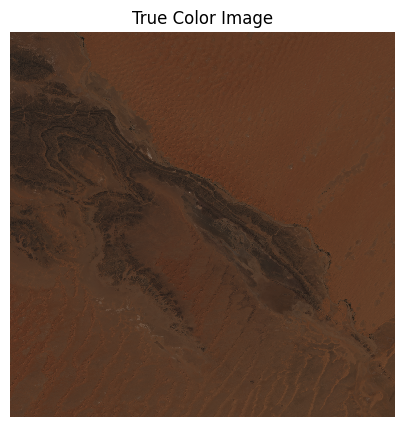

In [19]:
plot_true_color_image(l2a_analysis.reference_bands['ALG'])

mean       9.621222
std      161.361465
max     2031.222168
min    -4684.888672
dtype: float32

Max value: 0.404541015625


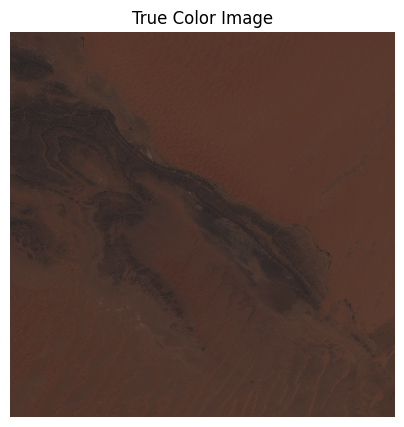

Max value: 0.51556396484375


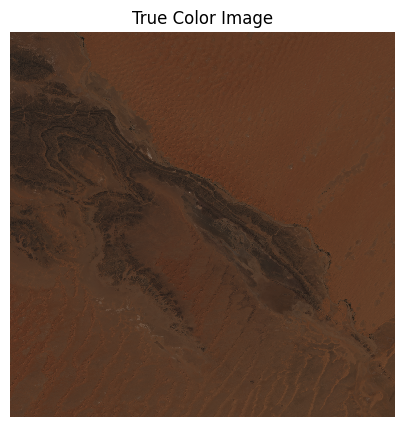

Max value: 0.51556396484375


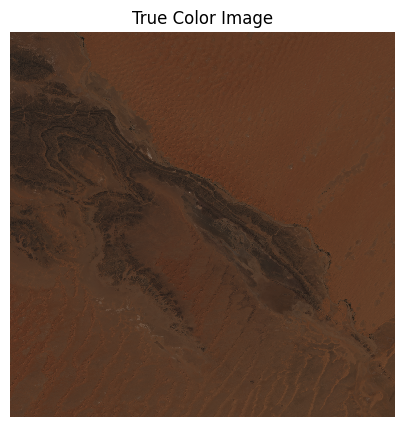

In [20]:
loc = 'CH'
mod = 'class_NO_DATA'
stat_bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B11", "B12"]
stats = get_stats_average(l2a_analysis.reference_bands[loc], l2a_analysis.modified_bands[loc][mod], stat_bands)
display(stats)

plot_true_color_image(l2a_analysis.modified_bands['ALG']['class_NO_DATA'])
plot_true_color_image(l2a_analysis.modified_bands['ALG']['class_CASTED_SHADOWS'])
plot_true_color_image(l2a_analysis.reference_bands['ALG'])
